**Цель исследования: *сделать предположения на основе изученных данных о возможных причинах оттока клиентов из банка***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка данных

In [ ]:
df = pd.read_csv('Churn Modeling.csv', index_col='RowNumber')

 ## Описательная статистика

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Визуализация и анализ графиков

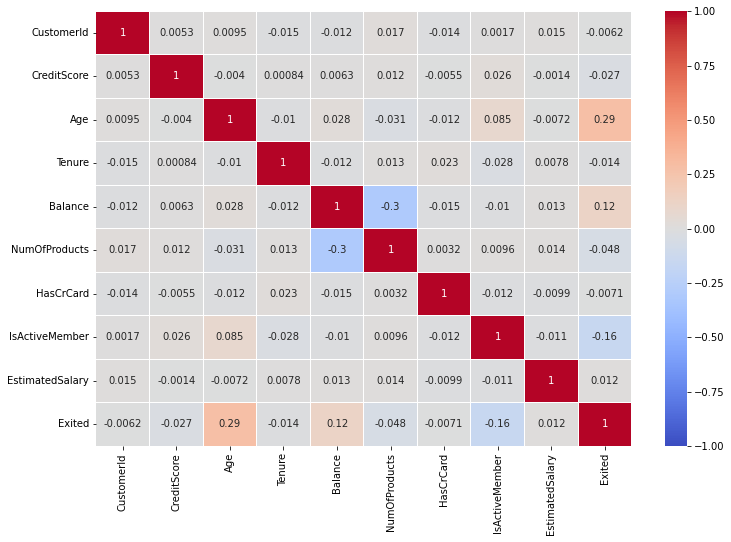

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, linewidths=0.1)
pass

Сильных линейных взаимосвязей в признаках нет

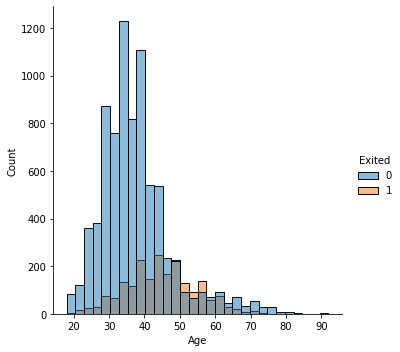

In [ ]:
sns.displot(data=df, x='Age', hue='Exited', bins=30)
pass

Из данного графика видно, что распределение возраста ушедших клиентов смещено вправо относительно оставшихся клиентов. Можно сделать предположение о том, средний возраст ушедшего клиента больше чем оставшегося

In [ ]:
print(f"Средний возраст оставшегося клиента: {df[df['Exited'] == 0]['Age'].mean()}\nСредний возраст ушедшего клиента: {df[df['Exited'] == 1]['Age'].mean()}")

Средний возраст оставшегося клиента: 37.40838879819164
Средний возраст ушедшего клиента: 44.8379970544919


Проверим значимы ли различия с помощью T-test:

In [ ]:
df_age_exited = (df[df['Exited'] == 1])[['Age']]
df_age_no_exited = (df[df['Exited'] == 0])[['Age']]

In [ ]:
from scipy import stats

_, p_val = stats.ttest_ind(df_age_exited, df_age_no_exited)

In [ ]:
p_val < 0.05

array([ True])

Мы получили статистически значимые различия возраста между клиентами, которые ушли из банка и остались

Из данных результатов можно сделать предположение о том, что банковские продукты или условия удовлетворяют клиентов более молодой возрастной категории.

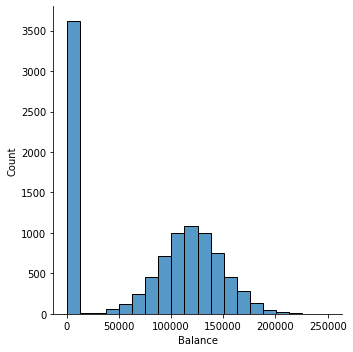

In [ ]:
sns.displot(data=df[df['Balance'] > -1], x='Balance', multiple='stack', bins=20)

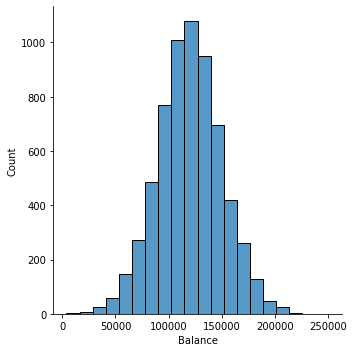

In [ ]:
sns.displot(data=df[df['Balance'] > 0], x='Balance', multiple='stack', bins=20)

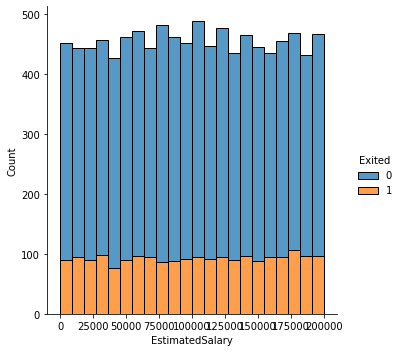

In [ ]:
sns.displot(data=df, x='EstimatedSalary', hue='Exited', multiple='stack')
pass

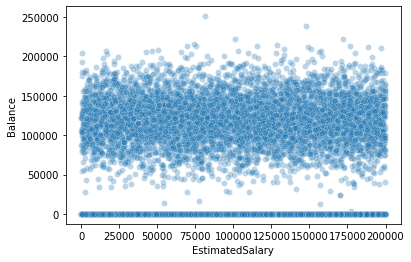

In [ ]:
sns.scatterplot(data=df, x='EstimatedSalary', y='Balance', alpha=0.3)

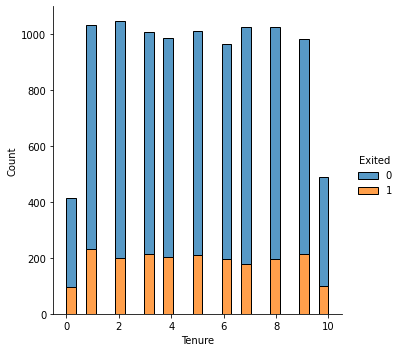

In [ ]:
sns.displot(data=df, x='Tenure', hue='Exited', multiple='stack')
pass

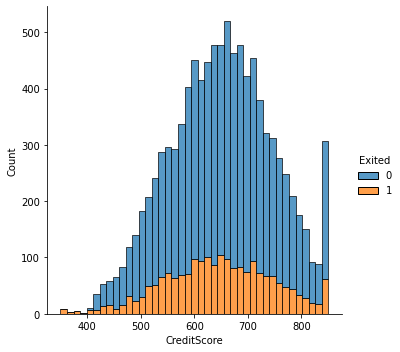

In [ ]:
sns.displot(data=df, x='CreditScore', hue='Exited', multiple='stack')
pass

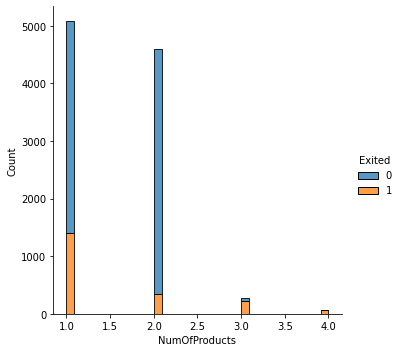

In [ ]:
sns.displot(data=df, x='NumOfProducts', hue='Exited', multiple='stack')

По графику видно, что большинство пользователей продуктов под номерами 3 и 4 уходят из банка. Можно предположить, что качество данных продуктов разочаровывает клиентов либо это специфика данного продукта. 

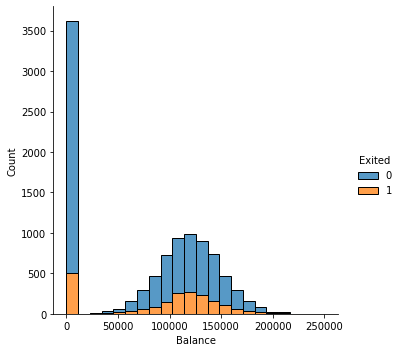

In [ ]:
sns.displot(data=df, x='Balance', hue='Exited', multiple='stack')
pass

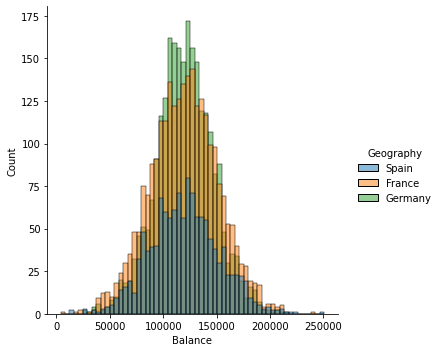

In [ ]:
sns.displot(data=df[df['Balance'] > 0], x='Balance', hue='Geography')

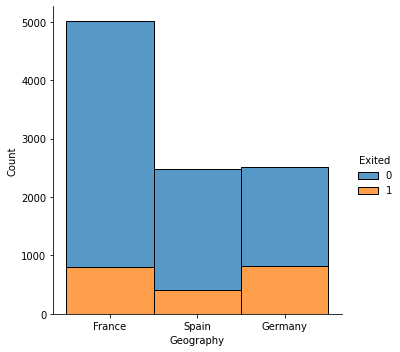

In [ ]:
sns.displot(data=df, x='Geography', hue='Exited', multiple='stack')

In [ ]:
df_country = df[df['Exited'] == 1].groupby(['Geography']).count()[['Exited']]

In [ ]:
df_country

,Exited
Geography,
France,810
Germany,814
Spain,413


In [ ]:
df_country['Not_Exited'] = df[df['Exited'] == 0].groupby(['Geography']).count()[['Exited']]

In [ ]:
df_country.reset_index(inplace=True)

In [ ]:
df_country['All'] = df_country['Exited'] + df_country['Not_Exited']

In [ ]:
df_country['Exited_ratio'] = df_country['Exited'] / df_country['All']

In [ ]:
df_country

,Geography,Exited,Not_Exited,All,Exited_ratio
0,France,810,4204,5014,0.161548
1,Germany,814,1695,2509,0.324432
2,Spain,413,2064,2477,0.166734


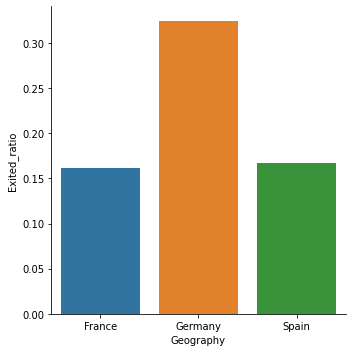

In [ ]:
sns.catplot(data=df_country, x='Geography', y='Exited_ratio', kind='bar')
pass

Процентное соотношение ушедших клиентов в Германии самое высокое.

In [ ]:
df_gender = pd.DataFrame()
df_gender['Exited'] = df[df['Exited'] == 1].groupby('Gender').count()['CustomerId']
df_gender['No_Exited'] = df[df['Exited'] == 0].groupby('Gender').count()['CustomerId']
df_gender['All'] = df.groupby('Gender').count()['CustomerId']
df_gender['Exited_ratio'] = df_gender['Exited'] / df_gender['All']
df_gender.reset_index(inplace=True)

In [ ]:
df_gender

,Gender,Exited,No_Exited,All,Exited_ratio
0,Female,1139,3404,4543,0.250715
1,Male,898,4559,5457,0.164559


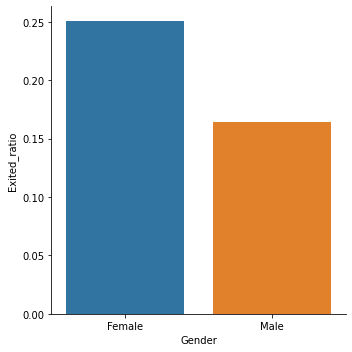

In [ ]:
sns.catplot(data=df_gender, x='Gender', y='Exited_ratio', kind='bar')
pass

Процентное соотношение ушедших клиентов женского пола выше чем мужского.

## Предобработка данных

In [ ]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_ = df.drop(columns=['CustomerId', 'Surname', 'Exited'])

In [ ]:
df_ = df_[df_['Balance'] > 0]

In [ ]:
s = (df_.dtypes == 'object')
object_cols = list(s[s].index)

In [ ]:
from sklearn import preprocessing

oenc = preprocessing.OrdinalEncoder()

In [ ]:
df_[object_cols] = oenc.fit_transform(df_[object_cols])

In [ ]:
oenc.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
df_.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
2,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
3,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
5,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
6,645,2.0,1.0,44,8,113755.78,2,1,0,149756.71
8,376,1.0,0.0,29,4,115046.74,4,1,0,119346.88


In [ ]:
norm = preprocessing.StandardScaler()
df_norm = norm.fit_transform(df_)

In [ ]:
df_norm.shape

(6383, 10)

In [ ]:
df_norm

array([[-0.4450616 ,  1.60609711, -1.09973407, ..., -1.52462427,
         0.97325429,  0.20610122],
       [-1.53866796, -1.05634098, -1.09973407, ...,  0.65589931,
        -1.0274807 ,  0.23030985],
       [ 2.05166235,  1.60609711, -1.09973407, ...,  0.65589931,
         0.97325429, -0.37704476],
       ...,
       [-1.39422939, -1.05634098,  0.90931074, ...,  0.65589931,
         0.97325429,  0.01712249],
       [ 1.24693314,  0.27487807,  0.90931074, ...,  0.65589931,
        -1.0274807 , -0.13644829],
       [ 1.45327396, -1.05634098, -1.09973407, ...,  0.65589931,
        -1.0274807 , -1.08977216]])

## Кластеризация

#### KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
K = range(1, 20)
models = [KMeans(n_clusters=k).fit(df_norm) for k in K]
dist = [model.inertia_ for model in models]

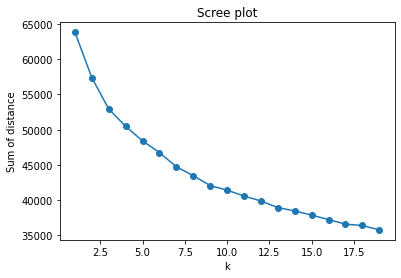

In [ ]:
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distance')
plt.title('Scree plot')
plt.show()

In [ ]:
oenc.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [ ]:
model = KMeans(n_clusters=6)
model.fit(df_norm)
df_['cluster'] = model.labels_
df_.groupby('cluster').mean()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
cluster,,,,,,,,,,
0,647.807975,0.793284,0.000000,38.421826,5.079748,118795.936034,1.313746,1.000000,0.000000,103298.478909
1,654.068290,0.797506,0.546318,36.917458,4.871140,119270.834139,1.336105,0.000000,0.495249,101901.224988
2,645.183803,0.744313,1.000000,37.089172,5.176524,122416.611802,1.312102,1.000000,0.000000,101197.263103
3,651.674769,0.853009,0.528935,37.869213,4.938657,120359.246840,2.296296,0.932870,0.855324,102742.493692
4,655.659278,0.774220,0.571429,35.393268,4.917898,118714.681018,1.000000,1.000000,1.000000,98128.801034
5,649.040708,0.828319,0.569912,61.637168,4.946903,119776.201823,1.240708,0.684956,0.861947,94385.069522


In [ ]:
model = KMeans(n_clusters=9)
model.fit(df_norm)
df_['cluster'] = model.labels_
df_.groupby('cluster').mean()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
cluster,,,,,,,,,,
0,648.378505,0.841121,0.411215,44.191589,5.182243,120074.314953,3.214953,0.719626,0.401869,106050.686262
1,665.791317,0.464986,0.581232,36.298319,7.438375,123348.862703,1.369748,1.000000,1.000000,105522.711695
2,656.561927,0.808486,0.552752,37.255734,4.690367,118376.856284,1.346330,0.000000,1.000000,103339.508200
3,644.936441,0.866525,0.586864,62.750000,4.976695,120334.982182,1.258475,0.747881,0.894068,94049.489153
4,647.044929,0.476252,0.536585,35.346598,2.456996,115956.637125,1.365854,1.000000,1.000000,92826.159525
5,646.202882,0.463415,1.000000,37.222838,5.186253,122707.201475,1.318182,1.000000,0.000000,101705.394723
6,649.314767,2.000000,0.573834,36.726684,5.089378,118680.146891,1.268135,1.000000,0.524611,100681.848316
7,651.334868,0.788262,0.539701,37.849252,5.063291,120325.119931,1.321059,0.000000,0.000000,100227.229217
8,647.595691,0.533587,0.000000,38.486692,5.076046,118977.759911,1.309252,1.000000,0.000000,103249.299721


#### DBCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN()